<a href="https://colab.research.google.com/github/pouyarahmti/Pytorch-Deep-Learning-Bootcamp/blob/main/04_PyTorch_Custom_Datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 4. PyTorch Custom Datasets

how do you get your own data into PyTorch?

one of the ways to do so is by using PyTorch's `Dataset` class or PyTorch Custom Datasets.

### Domain Libraries
depending on the use case, Vision, Audio, or Text, you can use PyTorch's domain libraries for existing dataloader and functions.


## 0. Importing Pytorch and set device agnostic code

In [2]:
import torch
from torch import nn

print(torch.__version__)

2.2.1+cu121


In [3]:
# Device agnostic code

device = "cuda" if torch.cuda.is_available() else "cpu"

device

'cuda'

## 1. Get Data

In [4]:
import requests
import zipfile
from pathlib import Path

# Setup data path and download data
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

if image_path.is_dir():
  print(f"{image_path} directory exists.")
else:
  print(f"Did not find {image_path} directory, creating one...")
  image_path.mkdir(parents=True, exist_ok=True)

# Download pizza, steak and sushi

with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
  request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
  print("Downloading pizza, steak and sushi data...")
  f.write(request.content)

# Unzip pizza, steak and sushi

with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
  print("Unzipping pizza, steak and sushi data...")
  zip_ref.extractall(image_path)

!ls data/pizza_steak_sushi


Did not find data/pizza_steak_sushi directory, creating one...
Unzipping pizza, steak and sushi data...
test  train


## 2. Becoming one with data (data preparation and data exploration)

In [5]:
import os
def walk_through_dir(dir_path):
  """ Walks through dir_path returning its contents. """
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")


walk_through_dir(image_path)

There are 2 directories and 0 images in 'data/pizza_steak_sushi'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi/test'.
There are 0 directories and 25 images in 'data/pizza_steak_sushi/test/pizza'.
There are 0 directories and 19 images in 'data/pizza_steak_sushi/test/steak'.
There are 0 directories and 31 images in 'data/pizza_steak_sushi/test/sushi'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi/train'.
There are 0 directories and 78 images in 'data/pizza_steak_sushi/train/pizza'.
There are 0 directories and 75 images in 'data/pizza_steak_sushi/train/steak'.
There are 0 directories and 72 images in 'data/pizza_steak_sushi/train/sushi'.


In [6]:
# Setup training and testing paths

train_dir = image_path / "train"
test_dir = image_path / "test"

train_dir, test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

### 2.1 Visiualize some images

Let's write some code to visualize some images:
1. Get all the image paths
2. Choice a random image using python's `random.choice()`
3. Get the image class name using `Pathlib.path.parent.stem`
4. Display the image using python pillow

Random image path: data/pizza_steak_sushi/test/steak/1882831.jpg - class name: steak 

Image mode: RGB
Image size: (306, 512)
Image height: 512
Image width: 306
Image format: JPEG


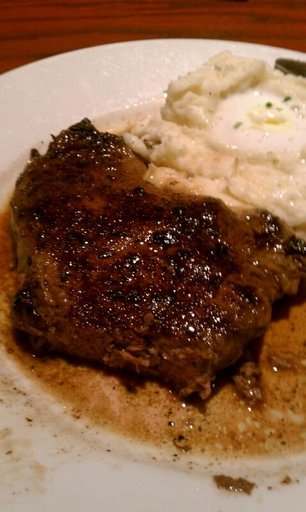

In [7]:
import random
from PIL import Image

# Set seed
# SEED = 42
# random.seed(SEED)

# 1. Get all image paths (* means "any extension")
image_paths = list(image_path.glob("*/*/*.jpg"))


# 2. Get random image path
random_image_path = random.choice(image_paths)

# 3. Get image class
class_name = random_image_path.parent.stem
print(f"Random image path: {random_image_path} - class name: {class_name} \n")

# 4. Open image

image = Image.open(random_image_path)

# 5. Print image details
print(f"Image mode: {image.mode}")
print(f"Image size: {image.size}")
print(f"Image height: {image.height}")
print(f"Image width: {image.width}")
print(f"Image format: {image.format}")

# 6. Show image
image

(-0.5, 305.5, 511.5, -0.5)

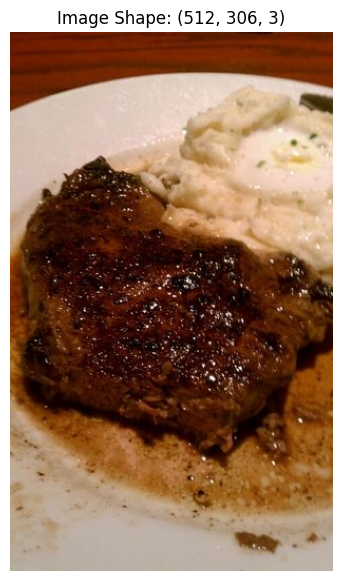

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Turn the image into an array
img_as_array = np.asarray(image)

# Plot the image
plt.figure(figsize=(10, 7))
plt.imshow(img_as_array)
plt.title(f'Image Shape: {img_as_array.shape}')
plt.axis(False)

## 3. Transforming Data into Tensors

before we can use PyTorch with our data, we need to transform it into a tensor.

2. Turn data into `torch.utils.data.Dataset`
3. Turn the data set into a `torch.utils.data.DataLoader`

In [9]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

### 3.1 Transforming data using torchvision.transforms

In [10]:
# Write a transform for image

data_transform = transforms.Compose([
    # Resize our images to 64 x 64
    transforms.Resize((64, 64)),
    # Flip the image horizontally
    transforms.RandomHorizontalFlip(p=0.5),
    # Turn image into a tensor
    transforms.ToTensor(),
])

In [13]:
data_transform(image).dtype

torch.float32

(None,)

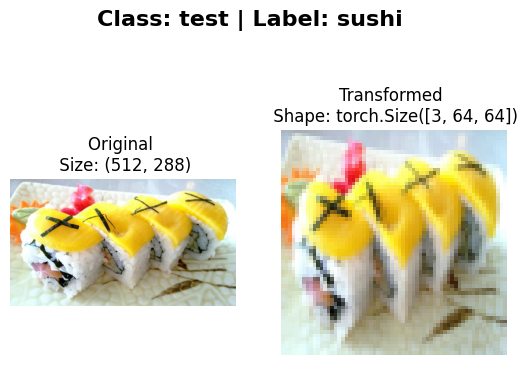

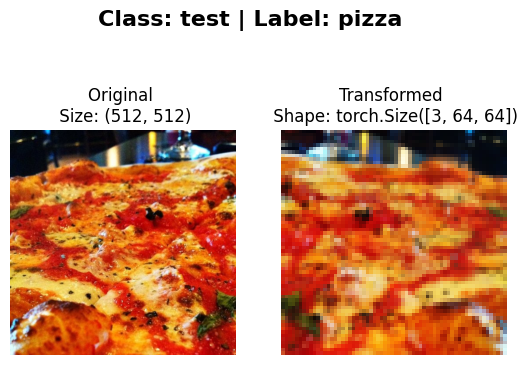

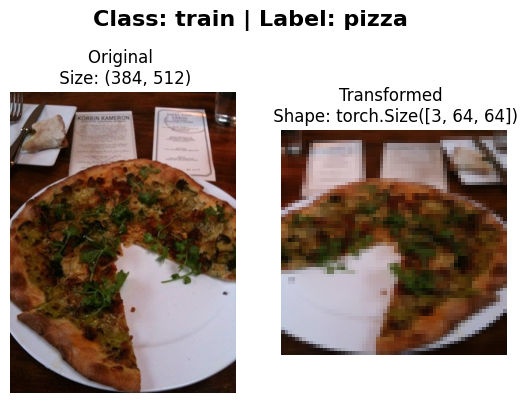

In [19]:
def plot_transformed_image(image_paths: list, transform, n=3, seed=42):
  """Plots `n` random images and their transformed versions."""

  # Set seed
  random.seed(seed)


  random_image_paths = random.sample(image_paths, k=n)

  for image_path in random_image_paths:

    with Image.open(image_path) as f:
      fig, ax = plt.subplots(nrows = 1, ncols = 2)

      ax[0].imshow(f)
      ax[0].set_title(f"Original \n Size: {f.size}")
      ax[0].axis(False)

      # Transform image
      transformed_image = transform(f)
      ax[1].imshow(transformed_image.permute(1, 2, 0)) # permute to go from {C, H, W} to {H, W, C}
      ax[1].set_title(f"Transformed \n Shape: {transformed_image.shape}")
      ax[1].axis(False)

      fig.suptitle(f"Class: {image_path.parent.parent.stem} | Label: {image_path.parent.stem}", fontweight = "bold", fontsize =16),


plot_transformed_image(image_paths, data_transform, n=3,),

## 4. Option 1 - Loading Image data using `ImageFolder`

we can load image classification data using `torchvision.datasets.ImageFolder`.

In [22]:
from torchvision import datasets

train_data = datasets.ImageFolder(train_dir,
                                  transform=data_transform, # A transform for images
                                  target_transform=None # A transform for targets ( labels )
                                  )

test_data = datasets.ImageFolder(test_dir,
                                  transform=data_transform, # A transform for images
                                  target_transform=None # A transform for targets ( labels )
                                  )


print(f"Train data:\n{train_data}\nTest data:\n{test_data}")

Train data:
Dataset ImageFolder
    Number of datapoints: 225
    Root location: data/pizza_steak_sushi/train
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )
Test data:
Dataset ImageFolder
    Number of datapoints: 75
    Root location: data/pizza_steak_sushi/test
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )


In [33]:
# Get the class names
class_names = train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [27]:
# Get class names as dict
class_dict = train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [28]:
# Check the length of the data
len(train_data), len(test_data)

(225, 75)

In [34]:
# Index on the train_data to get a single image and label
img, label = train_data[0][0], train_data[0][1]

print(f"Image Tensor : {img}")
print(f"Image shape : {img.shape}")
print(f"Label : {label}")
print(f"Class name : {class_names[label]}")
print(f"Image Type : {img.dtype}")

Image Tensor : tensor([[[0.1176, 0.1216, 0.1255,  ..., 0.0980, 0.1020, 0.1137],
         [0.1294, 0.1294, 0.1294,  ..., 0.0980, 0.0980, 0.1059],
         [0.1333, 0.1333, 0.1333,  ..., 0.0941, 0.0980, 0.1020],
         ...,
         [0.1686, 0.1647, 0.1686,  ..., 0.1255, 0.1098, 0.1098],
         [0.1686, 0.1647, 0.1686,  ..., 0.1098, 0.0941, 0.0902],
         [0.1647, 0.1647, 0.1686,  ..., 0.0980, 0.0863, 0.0863]],

        [[0.0588, 0.0588, 0.0588,  ..., 0.0745, 0.0706, 0.0745],
         [0.0627, 0.0627, 0.0627,  ..., 0.0745, 0.0706, 0.0745],
         [0.0706, 0.0706, 0.0706,  ..., 0.0745, 0.0745, 0.0706],
         ...,
         [0.2392, 0.2392, 0.2510,  ..., 0.1373, 0.1333, 0.1255],
         [0.2314, 0.2392, 0.2510,  ..., 0.1255, 0.1176, 0.1098],
         [0.2275, 0.2353, 0.2431,  ..., 0.1137, 0.1059, 0.1020]],

        [[0.0196, 0.0196, 0.0157,  ..., 0.0902, 0.0902, 0.0941],
         [0.0196, 0.0157, 0.0196,  ..., 0.0902, 0.0863, 0.0902],
         [0.0196, 0.0157, 0.0157,  ..., 0.0

Original image shape : torch.Size([3, 64, 64])
Permuted image shape : torch.Size([64, 64, 3])


Text(0.5, 1.0, 'Class: pizza')

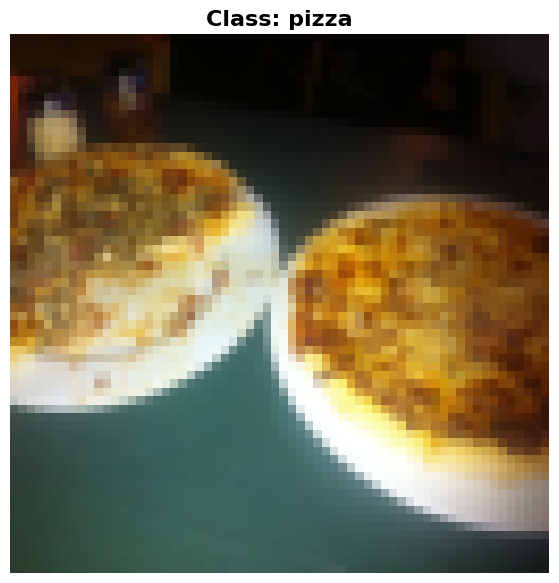

In [38]:
# Rearrange the dimensions

img_permuted = img.permute(1, 2, 0)

print(f"Original image shape : {img.shape}")
print(f"Permuted image shape : {img_permuted.shape}")

plt.figure(figsize=(10, 7))
plt.imshow(img_permuted)
plt.axis(False)
plt.title(f"Class: {class_names[label]}", fontweight = "bold", fontsize =16)
